# Análise de Dados Tabulares com Python e Pandas

![](https://raw.githubusercontent.com/davsimoes/mcde-pds/main/img/pandas.png)

Esta aula cobre os seguintes tópicos:

- Ler um ficheiro CSV para um data frame Pandas
- Obter dados de data frames Pandas
- Consulta, ordenação e análise de dados
- Fusão, agrupamento, e agregação de dados
- Extrair informação útil de datas
- Gráficos básicos com gráficos de linhas e de barras
- Escrever data frames para ficheiros CSV

### Como executar o código

Esta aula é um [Jupyter notebook](https://jupyter.org) executável. Pode _correr_ esta aula e experimentar os exemplos de código de diferentes formas: *localmente no seu computador*, ou *utilizando um serviço online gratuito*.

#### Opção 1: Correr localmente no seu computador

Para correr localmente o código no seu computador, faça download do notebook e abra o ficheiro com uma aplicação ou ambiente de desenvolvimento suportado, por exemplo:
* Visual Studio Code: https://code.visualstudio.com/download
* Anaconda: https://www.anaconda.com/download
* Miniconda: https://docs.conda.io/projects/miniconda/en/latest/

Em qualquer das opções, as aplicações terão de suportar (nativamente ou através de extensões) o [Python](https://www.python.org) e os [Jupyter notebooks](https://jupyter.org), de forma a disponibilizar um ambiente de visualização e execução local com um kernel que execute o código Python contido no notebook.

#### Opção 2: Correr num serviço online gratuito

Para executar o notebook online, faça upload do notebook para o serviço da sua preferência, por exemplo:
* Google Colab: https://colab.google/
* Binder (com repositório GitHub): https://mybinder.org/
* Kaggle: https://www.kaggle.com/


>  **Jupyter Notebooks**: Esta aula é um [Jupyter notebook](https://jupyter.org) - um documento feito de _células_. Cada célula pode conter código escrito em Python ou explicações em português. Pode executar células de código e visualizar os resultados, e.g., números, mensagens, gráficos, tabelas, ficheiros, etc., instantaneamente no notebook. O Jupyter é uma plataforma poderosa para experimentação e análise. Não tenha medo de mexer no código ou estragar alguma coisa - aprenderá muito ao encontrar e corrigir erros. Pode utilizar a opção de menu "Kernel > Restart & Clear Output" (Kernel > Reiniciar e Limpar Saída) para limpar todas as saídas e recomeçar do início.

## Ler um ficheiro CSV com o Pandas

O [Pandas](https://pandas.pydata.org/) é uma biblioteca popular de Python usada para trabalhar com dados tabulares (dados tipicamente armazenados em folhas de cálculo). O Pandas oferece funções auxiliares para ler dados de diferentes formatos como CSV, folhas de cálculo Excel, tabelas HTML, JSON, SQL, e outros.

Vamos fazer o download de um ficheiro `italy-covid-daywise.txt` que contém dados diários de Covid-19 para a Itália no seguinte formato:

```
date,new_cases,new_deaths,new_tests
2020-04-21,2256.0,454.0,28095.0
2020-04-22,2729.0,534.0,44248.0
2020-04-23,3370.0,437.0,37083.0
2020-04-24,2646.0,464.0,95273.0
2020-04-25,3021.0,420.0,38676.0
2020-04-26,2357.0,415.0,24113.0
2020-04-27,2324.0,260.0,26678.0
2020-04-28,1739.0,333.0,37554.0
...
```

Este formato de armazenamento de dados é conhecido como *comma-separated values* ou CSV. 

> **CSVs**: Um ficheiro de valores separados por vírgula (CSV) é um ficheiro de texto delimitado que utiliza uma vírgula para separar os valores. Cada linha do ficheiro é um registo de dados. Cada registo é composto por um ou mais campos, separados por vírgulas. Normalmente, um ficheiro CSV armazena dados tabulares (números e texto), caso em que cada linha terá o mesmo número de campos. (Wikipedia)


Vamos descarregar este ficheiro usando a função `urlretrieve` do módulo `urllib.request`.

In [1]:
from urllib.request import urlretrieve

In [2]:
italy_covid_url = 'https://raw.githubusercontent.com/davsimoes/mcde-pds/main/res/italy-covid-daywise.csv'

urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x1cbb055ed40>)

Para ler o ficheiro, podemos usar o método `read_csv` do Pandas. Primeiro, vamos instalar a biblioteca Pandas.

In [3]:
%pip install pandas --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


We can now import the `pandas` module. As a convention, it is imported with the alias `pd`.

In [4]:
import pandas as pd

C:\Users\klysm\AppData\Local\Temp\ipykernel_16576\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
covid_df = pd.read_csv('italy-covid-daywise.csv')

Os dados do ficheiros são lidos e armazenados num objeto `DataFrame` - uma das estruturas de dados essenciais no Pandas para armazenar e trabalhar como dados tabulares. Tipicamente usamos o sufixo `_df` nos nomes das variáveis para os dataframes.

In [6]:
type(covid_df)

pandas.core.frame.DataFrame

In [7]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


Vejamos o que podemos dizer olhando para o dataframe:

- O ficheiro fornece quatro contagens diárias para a COVID-19 em Itália
- As métricas reportadas são novos casos, mortes, e testes
- São fornecidos dados para 248 dias: de 12 de dezembro de 2019 a 3 de setembro de 2020

Lembre-se que estes são números oficialmente reportados. O número real de casos e mortes pode ser maior, dado que nem todos os casos são diagnosticados.

Podemos ver alguma informação básica sobre o dataframe usando o método `.info`.

In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


Parece que cada coluna contém valores de um tipo de dados específico. Podemos ver informação estatística para colunas numéricas (média, desvio padrão, valores mínimos/máximos, e o número de valores não vazios) usando o método `.describe`.

In [9]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


A propriedade `columns` contém a lista de colunas do dataframe.

In [10]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

Podemos também obter o número de linhas e colunas no dataframe com a propriedade `.shape`

In [11]:
covid_df.shape

(248, 4)

Aqui está um sumário das funções e métodos que vimos até agora:

* `pd.read_csv` - Ler dados de um ficheiro CSV para um objeto `DataFrame` do Pandas
* `.info()` - Visualizar informação básica sobre linhas, colunas e tipos de dados
* `.describe()` - Visualizar informação estatística sobre colunas numéricas
* `.columns` - Obter a lista de nomes de colunas
* `.shape` - Obter o número de linhas e colunas na forma de um tuplo


## Obter dados de um dataframe

A primeira coisa que podemos querer fazer é obter dados deste dataframe, e.g., as contagens de um dia específico ou a lista de valores de uma coluna em particular. Para fazer isto, talvez seja útil perceber a representação interna dos dados num dataframe. Conceptualmente, podemos pensar num dataframe como um dicionário de listas: as chaves são nomes de colunas, e os valores são listas/arrays contendo dados para as colunas respetivas.

In [12]:
# O formato do Pandas é similar a isto
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

Representar os dados no formato acima tem alguns benefícios:

* Todos os valores numa coluna têm tipicamente o mesmo tipo de valor, por isso é mais eficiente armazená-los num array único.
* Para obter os valores de uma linha em particular basta simplesmente extrair os elementos num dado índice de cada array de coluna.
* A representação é mais compacta (os nomes de colunas são armazenados apenas uma vez) comparado com outros formatos que usem um dicionário para cada linha de dados (ver o exemplo abaixo).

In [13]:
#  O formato do Pandas não é similar a isto
covid_data_list = [
    {'date': '2020-08-30', 'new_cases': 1444, 'new_deaths': 1, 'new_tests': 53541},
    {'date': '2020-08-31', 'new_cases': 1365, 'new_deaths': 4, 'new_tests': 42583},
    {'date': '2020-09-01', 'new_cases': 996, 'new_deaths': 6, 'new_tests': 54395},
    {'date': '2020-09-02', 'new_cases': 975, 'new_deaths': 8 },
    {'date': '2020-09-03', 'new_cases': 1326, 'new_deaths': 6},
]

Com a analogia do dicionário de listas em mente, podemos adivinhar como obter dados de um dataframe. Por exemplo, podemos obter uma lista de valores de uma coluna específica usando a notação de indexação `[]`.

In [14]:
covid_data_dict['new_cases']

[1444, 1365, 996, 975, 1326]

In [15]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Cada coluna é representada usando uma estrutura de dados chamada `Series`, que é essencialmente um array numpy com mais uns métodos e propriedades extra.

In [16]:
type(covid_df['new_cases'])

pandas.core.series.Series

Tal como nos arrays, podemos obter um valor específico de uma série usando a notação de indexação `[]`.

In [17]:
covid_df['new_cases'][246]

975.0

In [18]:
covid_df['new_tests'][240]

57640.0

O Pandas também oferece o método `.at` para obter diretamente o elemento numa linha e coluna específicas.

In [19]:
covid_df.at[246, 'new_cases']

975.0

In [20]:
covid_df.at[240, 'new_tests']

57640.0

Em vez de usar a notação de indexação `[]`, o Pandas também permite aceder às colunas como propriedades do dataframe com a notação `.`. Contudo, este método só funciona para colunas cujos nomes não contenham espaços ou caracteres especiais.

In [21]:
covid_df.new_cases

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

Além disso, também podemos passar uma lista de colunas na notação de indexação `[]` para aceder a um subconjunto do dataframe com apenas as colunas indicadas.

In [22]:
cases_df = covid_df[['date', 'new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


O novo dataframe `cases_df` é simplesmente uma "view" do dataframe original `covid_df`. Ambos apontam para os mesmos dados na memória do computador. Alterar quaisquer valores num deles vai também alterar os valores respetivos no outro. A partilha de dados entre dataframes torna a manipulação de dados com o Pandas extremamente rápida. Não necessitamos de nos preocupar com a sobrecarga de copiar milhares ou milhões de linhas cada vez que queremos criar um dataframe a partir de outro.

Por vezes podemos querer fazer uma cópia completa do dataframe, caso em que poderemos usar o método `copy`.

In [23]:
covid_df_copy = covid_df.copy()

Os dados em `covid_df_copy` são completamente independentes de `covid_df`, e alterar valores dentro de um deles não irá afetar o outro.

Para aceder a uma linha de dados específica, o Pandas fornece o método `.loc`.

In [24]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [25]:
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

Cada linha obtida é também um objeto `Series`.

In [26]:
type(covid_df.loc[243])

pandas.core.series.Series

Podemos usar os métodos `.head` e `.tail` para visualizar as primeiras ou últimas linhas de dados.

In [27]:
covid_df.head(5)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [28]:
covid_df.tail(4)

,date,new_cases,new_deaths,new_tests
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


Repare acima que enquanto os primeiros valores das colunas `new_cases` e `new_deaths` são `0`, os valores correspondentes na coluna `new_tests` são `NaN`. Isto acontece porque o ficheiro CSV não contem quaisquer dados para a coluna `new_tests` para as datas específicas (podemos verificar isto olhando para o ficheiro). Estes valores podem estar em falta ou ser desconhecidos.

In [29]:
covid_df.at[0, 'new_tests']

nan

In [30]:
type(covid_df.at[0, 'new_tests'])

numpy.float64

A distinção entre `0` e `NaN` é subtil mas importante. Neste dataset, representa que os números de testes diários não foram reportados nas datas específicas. A Itália começou a reportar testes diários a 19 de abril de 2020. Já tinham sido feitos 935.310 testes antes de 19 de abril. 

Podemos encontrar o primeiro índice que não contém um valor `NaN` utilizando o método `first_valid_index` de uma coluna.

In [31]:
covid_df.new_tests.first_valid_index()

111

Vamos olhar para algumas linhas antes e depois deste índice para verificar que os valores se alteram de `NaN` para números válidos. Podemos fazer isto passando uma range ao método `loc`.

In [33]:
covid_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


Podemos usar o método `.sample` para obter uma amostra aleatória de linhas do dataframe.

In [34]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
86,2020-03-26,5210.0,685.0,NaN
244,2020-08-31,1365.0,4.0,42583.0
24,2020-01-24,0.0,0.0,NaN
164,2020-06-12,379.0,53.0,37651.0
34,2020-02-03,0.0,0.0,NaN
142,2020-05-21,665.0,161.0,40644.0
126,2020-05-05,1221.0,195.0,32211.0
62,2020-03-02,561.0,6.0,NaN
5,2020-01-05,0.0,0.0,NaN
197,2020-07-15,114.0,17.0,28392.0


Repare que, ainda que tenhamos retirado uma amostra aleatória, o índice original de cada linha é preservado - isto é uma propriedade útil dos dataframes.

Aqui fica um sumário das funções e métodos que vimos nesta secção:

- `covid_df['new_cases']` - Obter colunas como uma `Series` usando o nome da coluna
- `new_cases[243]` - Obter valores de uma `Series` usando um índice
- `covid_df.at[243, 'new_cases']` - Obter um valor único de um dataframe
- `covid_df.copy()` - Criar uma cópia independente de um dataframe
- `covid_df.loc[243]` - Obter uma linha ou um conjunto de linhas de um dataframe
- `head`, `tail`, e `sample` - Obter múltiplas linhas de dados do dataframe
- `covid_df.new_tests.first_valid_index` - Encontrar o primeiro índice não vazio numa série



## Analisar dados de um dataframe

Vamos tentar responder a algumas questões sobre os nossos dados.

**P: Qual é o número total de casos e mortes reportadas relacionados com a Covid-19 em Itália?**

Similarmente aos arrays Numpy, uma série Pandas suporta o método `sum` para responder a estas questões.

In [35]:
total_cases = covid_df.new_cases.sum()
total_deaths = covid_df.new_deaths.sum()

In [36]:
print('O número de casos reportados é {} e o número de mortes reportadas é {}.'.format(int(total_cases), int(total_deaths)))

O número de casos reportados é 271515 e o número de mortes reportadas é 35497.


**P: Qual é a taxa global de mortalidade (rácio entre as mortes reportadas e os casos reportados)?**

In [37]:
death_rate = covid_df.new_deaths.sum() / covid_df.new_cases.sum()

In [38]:
print("A taxa global de mortalidade reportada em Itália é {:.2f} %.".format(death_rate*100))

A taxa global de mortalidade reportada em Itália é 13.07 %.


**P: Qual é o número global de testes efetuados? Foi efetuado um total de 935.310 testes antes de serem comunicados os números dos testes diários.**


In [39]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [40]:
total_tests

5214766.0

**P: Qual a proporção de testes que retornaram um resultado positivo?**

In [41]:
positive_rate = total_cases / total_tests

In [42]:
print('{:.2f}% dos testes em Itália resultaram num diagnóstico positivo.'.format(positive_rate*100))

5.21% dos testes em Itália resultaram num diagnóstico positivo.


Tente perguntar e responder a mais algumas questões sobre os dados usando as células vazias abaixo.

## Consultar e ordenar linhas

Suponhamos que queremos apenas ver os dias que tiveram mais de 1000 casos reportados. Podemos usar uma expressão booleana para verificar quais as linhas que satisfazem este critério.

In [43]:
high_new_cases = covid_df.new_cases > 1000

In [44]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

A expressão booleana retorna uma série contendo valores booleanos `True` e `False`. Podemos usar esta série para selecionar um subconjunto de linhas do dataframe original, correspondendo aos valores `True` na série.

In [45]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


Podemos escrever isto de forma sucinta numa única linha passando a expressão booleana como um índice para o dataframe.

In [46]:
high_cases_df = covid_df[covid_df.new_cases > 1000]

In [47]:
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


O dataframe contém 72 linhas, mas por omissão são exibidas com o Jupyter apenas as primeiras e últimas cinco linhas, para brevidade. Podemos alterar algumas opções de visualização para ver todas as linhas.

In [49]:
from IPython.display import display
with pd.option_context('display.max_rows', 10):
    display(covid_df[covid_df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


Podemos também formular queries mais complexas envolvendo múltiplas colunas. Como exemplo, vamos tentar determinar os dias em que o rácio entre os casos reportados e os testes efetuados foi superior à taxa positiva global (`positive_rate`).

In [50]:
positive_rate

0.05206657403227681

In [51]:
high_ratio_df = covid_df[covid_df.new_cases / covid_df.new_tests > positive_rate]

In [52]:
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


O resultado de efetuar uma operação sobre duas colunas é uma nova série.

In [53]:
covid_df.new_cases / covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

Podemos usar esta série para adicionar uma nova coluna ao dataframe.

In [54]:
covid_df['positive_rate'] = covid_df.new_cases / covid_df.new_tests

In [55]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


Lembre-se contudo que às vezes demora alguns dias a obter os resultados de um teste, por isso não podemos comparar o número de novos casos com o número de testes efetuados no mesmo dia. Qualquer inferência baseada nesa coluna `positive_rate` será provavelmente incorreta. É fundamental estar atento a estas relações subtis que frequentemente não são transmitidas no ficheiro CSV e requerem algum contexto adicional externo. É sempre boa ideia analisar a documentação fornecida com o dataset ou pedir informação adicional.

Para já, vamos remover a coluna `positive_rate` com o método `drop`.

In [56]:
covid_df.drop(columns=['positive_rate'], inplace=True)

Consegue perceber o propósito do argumento `inplace`?

### Ordenar linhas usando valores de colunas

As linhas também podem ser ordenadas por uma coluna específica usando `.sort_values`. Vamos fazer uma ordenação para identificar os dias com os maiores números de casos, e depois ligar ao método `head` para listar apenas os primeiros 10 resultados.

In [57]:
covid_df.sort_values('new_cases', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN
83,2020-03-23,5560.0,649.0,NaN
80,2020-03-20,5322.0,429.0,NaN
85,2020-03-25,5249.0,743.0,NaN
90,2020-03-30,5217.0,758.0,NaN
86,2020-03-26,5210.0,685.0,NaN


Parece que as duas últimas semanas de março tiveram os números mais altos de casos diários. Vamos comparar este resultado com os dias onde foram registados os maiores números de mortes.

In [58]:
covid_df.sort_values('new_deaths', ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN
95,2020-04-04,4585.0,764.0,NaN
94,2020-04-03,4668.0,760.0,NaN
90,2020-03-30,5217.0,758.0,NaN
85,2020-03-25,5249.0,743.0,NaN
93,2020-04-02,4782.0,727.0,NaN


Parece que as mortes diárias atingiram um pico cerca de uma semana depois do pico nos novos casos diários.

Vamos ver também os dias com menos casos. Poderemos esperar ver os primeiros dias do ano nesta lista.

In [59]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


Parece que a contagem de novos casos em 20 de junho de 2020 foi `-148`, um número negativo! Não era algo que estivéssemos à espera, mas é esta a natureza dos dados reais. Pode tratar-se de um erro de introdução de dados, ou o governo pode ter emitido uma correção para compensar uma contagem incorreta no passado. Poderá pesquisar notícias e artigos online para tentar perceber porque é que o número foi negativo.

Vamos olhar para alguns dias antes e depois de 20 de junho de 2020.

In [60]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


Para já, vamos assumir que se tratou de facto de um erro de introdução de dados. Podemos usar uma das seguintes abordagens para lidar com o valor em falta ou incorreto:
1. Substituí-lo por `0`.
2. Substituí-lo pela média dos valores da coluna
3. Substituí-lo com a média entre os valores na data anterior e posterior
4. Descartar a linha por inteiro

A abordagem a tomar requer algum contexto sobre os dados e o problema. Neste caso, dado que estamos a lidar com dados ordenados por data, podemos avançar com a terceira abordagem.

Podemos usar o método `.at` para modificar um valor específico no dataframe.

In [61]:
covid_df.at[172, 'new_cases'] = (covid_df.at[171, 'new_cases'] + covid_df.at[173, 'new_cases'])/2

Aqui fica um sumário das funções e métodos que vimos nesta secção:

- `covid_df.new_cases.sum()` - Calcular a soma dos valores numa coluna ou série
- `covid_df[covid_df.new_cases > 1000]` - Fazer uma query sobre um subconjunto de linhas satisfazendo um dado critério com expressões booleanas
- `df['pos_rate'] = df.new_cases/df.new_tests` - Adicionar novas colunas combinando dados de colunas existentes
- `covid_df.drop('positive_rate')` - Remover uma ou mais colunas do dataframe
- `sort_values` - Ordenar as linhas de um dataframe usando valores de colunas
- `covid_df.at[172, 'new_cases'] = ...` - Substituir um valor num dataframe

## Trabalhar com datas

Embora já tenhamos olhado para os números globais para os casos, testes, taxa de positivos, etc., também poderá ser útil estudar estes números numa perspetiva mensal. A coluna `date` poderá ser útil aqui, dado que o Pandas oferece várias formas de trabalhar com datas.

In [62]:
covid_df.date

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

O tipo de dados da data é neste momento `object`, por isso o Pandas não sabe que esta coluna é uma data. Podemos convertê-la para uma coluna `datetime` usando o método `pd.to_datetime`.

In [63]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [64]:
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

Podemos ver que a coluna tem agora o tipo de dados `datetime64`. Podemos extrair diferentes partes dos dados em colunas separadas, usando a classe `DatetimeIndex` ([ver docs](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html)).

In [65]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [66]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


Vamos verificar as métricas globais para maio. Podemos fazer uma query às linhas para maio, escolher um subconjunto de colunas, e usar o método `sum` para agregar os valores de cada coluna.

In [67]:
# Filtrar as linhas para maio
covid_df_may = covid_df[covid_df.month == 5]

# Extrair o subconjunto das colunas a serem agregadas
covid_df_may_metrics = covid_df_may[['new_cases', 'new_deaths', 'new_tests']]

# Obter a soma de cada coluna
covid_may_totals = covid_df_may_metrics.sum()

In [68]:
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [69]:
type(covid_may_totals)

pandas.core.series.Series

Podemos também combinar as operações acima numa instrução única.

In [70]:
covid_df[covid_df.month == 5][['new_cases', 'new_deaths', 'new_tests']].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

Como exemplo adicional, vamos verificar se o número de casos reportados ao domingo é superior ao número médio de casos reportados diariamente. Desta vez, talvez queiramos agregar as colunas com o método `.mean`.

In [71]:
# Média global
covid_df.new_cases.mean()

1096.6149193548388

In [72]:
# Média para os domingos
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

Parece que foram reportados mais casos ao domingo do que nos outros dias.

Tente perguntar e responder a outras questões relacionadas com datas usando as células abaixo.

## Agrupamento e agregação

Como próximo passo, podemos querer sumarizar os dados diários e criar um novo dataframe com dados mensais. Podemos usar a função `groupby` para criar um grupo para cada mês, selecionar as colunas a agregar, e agregá-las com o método `sum`. 

In [73]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [74]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


O resultado é um novo dataframe que usa os valores da coluna passada ao `groupby` como índice. O agrupamento e a agregação são um método poderoso para sumarizar progressivamente os dados em dataframes mais pequenos.

Em vez de agregar por soma, podemos também agregar por outras operações como a média. Vamos calcular o número médio de novos casos diários, mortes, e testes para cada mês.

In [75]:
covid_month_mean_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].mean()

In [76]:
covid_month_mean_df

,new_cases,new_deaths,new_tests
month,,,
1,0.096774,0.000000,NaN
2,30.517241,0.724138,NaN
3,3253.258065,373.225806,NaN
4,3395.066667,536.366667,38144.636364
5,937.838710,182.516129,34797.419355
6,273.916667,46.800000,27678.466667
7,216.838710,12.516129,25732.000000
8,679.354839,11.129032,35442.064516
9,1099.000000,6.666667,54395.000000


Para além do agrupamento, outra forma de agregação é a soma contínua ou acumulada de casos, testes, ou mortes até à data de cada linha. Podemos usar o método `cumsum` para calcular a soma cumulativa como uma nova série. Vamos adicionar três novas colunas: `total_cases`, `total_deaths`, e `total_tests`.

In [77]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [78]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [79]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

Incluímos também a contagem de testes inicial em `total_test` para levar em conta os testes efetuados antes de se ter iniciado a comunicação diária.

In [80]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


Repare como os valores `NaN` em `total_tests` permanecem inafetados.

## Juntando dados de várias fontes

Para determinarmos outras métricas como testes por milhão, casos por milhão, etc., necessitamos de mais informação do país relativa à sua população. Vamos fazer o download de outro ficheiro `locations.csv` que contém informções de saúde para diversos países, incluindo a Itália.

In [81]:
urlretrieve('https://raw.githubusercontent.com/davsimoes/mcde-pds/main/res/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x1cbd0682080>)

In [82]:
locations_df = pd.read_csv('locations.csv')

In [83]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [84]:
locations_df[locations_df.location == "Italy"]

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


Podemos fundir ou fazer o *merge* destes dados no nosso dataframe existente adicionando mais colunas. Contudo, para fazer o *merge* de dois data frames, necessitamos de pelo menos uma coluna em comum. Vamos inserir uma coluna `location` no dataframe `covid_df` com todos os valores iguais a `"Italy"`.

In [85]:
covid_df['location'] = "Italy"

In [86]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


Podemos agora adicionar as colunas de `locations_df` em `covid_df` usando o método `.merge`.

In [87]:
merged_df = covid_df.merge(locations_df, on="location")

In [88]:
merged_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,5117788.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,5160371.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,5214766.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


Os dados de localização para Itália são acrescentados a cada linha em `covid_df`. Se o dataframe `covid_df` contivesse dados de múltiplas localizações, os dados de localização do país respetivo seriam acrescentados para cada linha.

Podemos agora calcular métricas como casos por milhão, mortes por milhão, e testes por milhão.

In [89]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [90]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [91]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population

In [ ]:
merged_df

## Escrever dados de volta para ficheiros

Depois de completarmos a nossa análise e adicionarmos novas colunas, faz sentido escrever os resultados de volta para um ficheiro. De outra forma, os dados serão perdidos quando o notebook Jupyter for desativado.
Antes de escrever para um ficheiro, vamos criar primeiro um dataframe contendo apenas as colunas que queremos gravar.

In [92]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million']]

In [93]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
244,2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
245,2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403
246,2020-09-02,975.0,270634.5,8.0,35491.0,NaN,NaN,4476.121695,586.998461,NaN


Para escrever os dados do dataframe para um ficheiro, podemos usar a função `to_csv`. 

In [94]:
result_df.to_csv('results.csv', index=None)

Por omissão, a função `to_csv` inclui também uma coluna adicional para armazenar o índice do dataframe. Passamos `index=None` para desligar este comportamento. Podemos verificar que o ficheiro `results.csv` foi criado e contém os dados do dataframe no formato CSV:

```
date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
2020-02-27,78.0,400.0,1.0,12.0,,,6.61574439992122,0.1984723319976366,
2020-02-28,250.0,650.0,5.0,17.0,,,10.750584649871982,0.28116913699665186,
2020-02-29,238.0,888.0,4.0,21.0,,,14.686952567825108,0.34732658099586405,
2020-03-01,240.0,1128.0,8.0,29.0,,,18.656399207777838,0.47964146899428844,
2020-03-02,561.0,1689.0,6.0,35.0,,,27.93498072866735,0.5788776349931067,
2020-03-03,347.0,2036.0,17.0,52.0,,,33.67413899559901,0.8600467719897585,
...
```

## Bónus: Gráficos básicos com Pandas

Normalmente usamos uma biblioteca como `matplotlib` ou `seaborn` para desenhar gráficos num notebook Jupyter. Contudo, Os dataframes e séries Pandas oferecem um método útil `.plot` para o desenho rápido e fácil de gráficos.

Vamos desenhar um gráfico de linhas mostrando o número de casos diários ao longo do tempo.

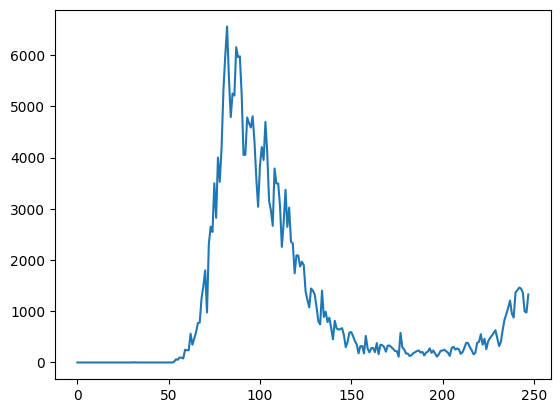

In [96]:
!pip install matplotlib --quiet
import matplotlib.pyplot as plt
result_df.new_cases.plot();

**Nota:** Dependendo do ambiente de execução, poderá ter de fazer `%pip install matplotlib` antes de usar o método `.plot`

Ainda que este gráfico mostre a tendência global, é difícil perceber onde é que ocorreu o pico, dado que não são há datas no eixo dos X. Podemos usar a coluna `date` como índice do dataframe para corrigir este problema.

In [97]:
result_df.set_index('date', inplace=True)

In [98]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,267298.5,1.0,35473.0,53541.0,5117788.0,4420.946386,586.700753,84644.943252
2020-08-31,1365.0,268663.5,4.0,35477.0,42583.0,5160371.0,4443.522614,586.766910,85349.238862
2020-09-01,996.0,269659.5,6.0,35483.0,54395.0,5214766.0,4459.995818,586.866146,86248.897403


Repare que o índice de um dataframe não tem de ser numérico. Usar a data como índice também nos permite obter os dados de uma data específica usando o `.loc`.

In [99]:
result_df.loc['2020-09-01']

new_cases             9.960000e+02
total_cases           2.696595e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.459996e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

Vamos traçar os novos casos e novas mortes por dia em gráficos de linhas.

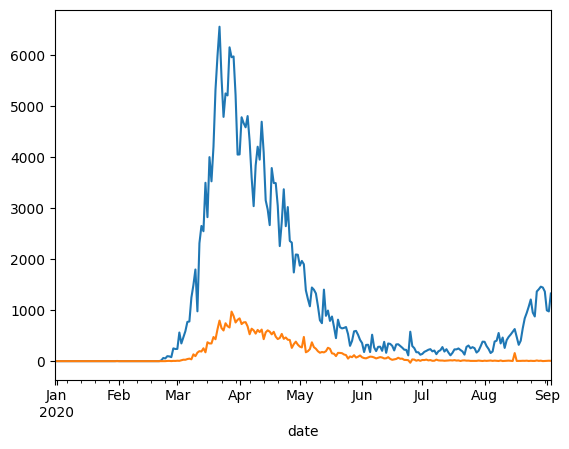

In [100]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

Podemos também comparar o número total de casos vs. total de mortes.

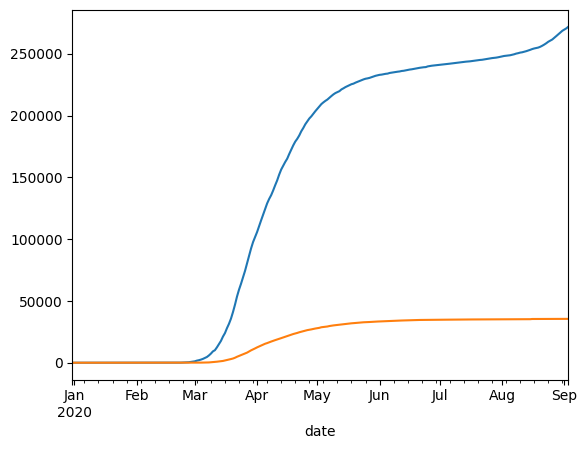

In [101]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

Vamos ver como é que a taxa de mortalidade e as taxas de testes positivos variam ao longo do tempo.

In [102]:
death_rate = result_df.total_deaths / result_df.total_cases

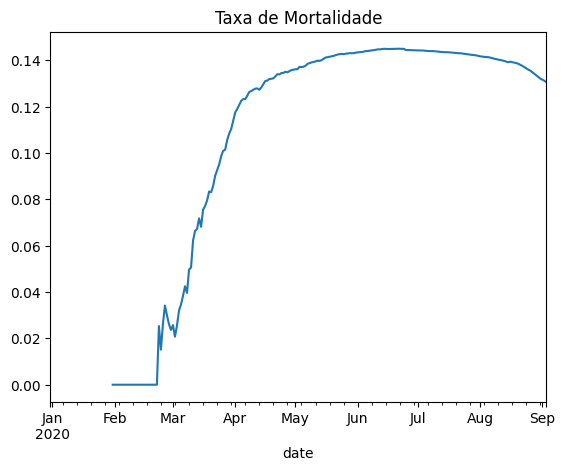

In [103]:
death_rate.plot(title='Taxa de Mortalidade');

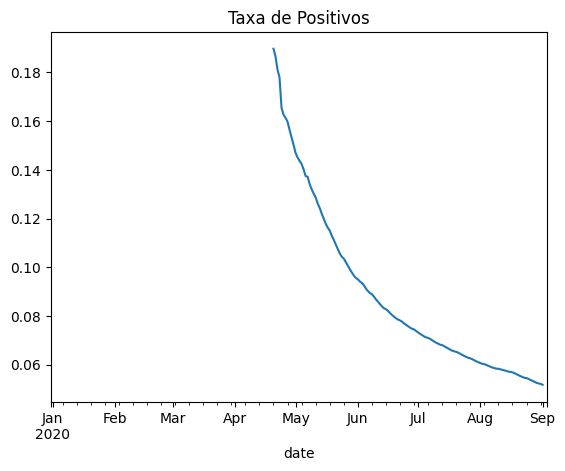

In [104]:
positive_rates = result_df.total_cases / result_df.total_tests
positive_rates.plot(title='Taxa de Positivos');

Finalmente, vamos apresentar alguns dados mensais usando um gráfico de barras para visualizar a tendência a um nível mais elevado

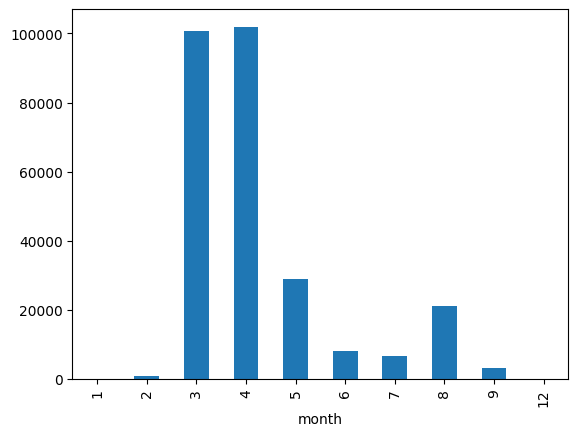

In [105]:
covid_month_df.new_cases.plot(kind='bar');

<Axes: xlabel='month'>

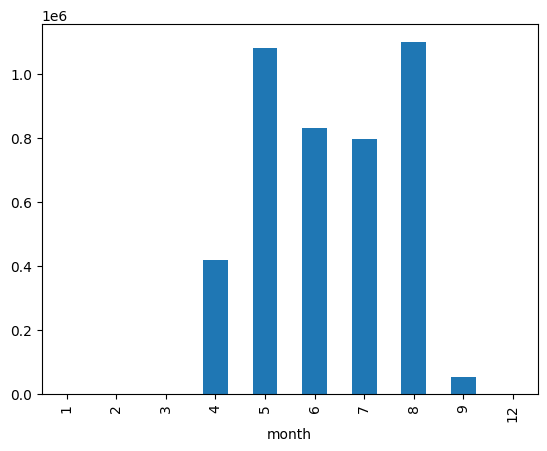

In [106]:
covid_month_df.new_tests.plot(kind='bar')

## Sumário e Leitura Complementar


Cobrimos os seguintes tópicos nesta aula:

- Ler um ficheiro CSV para um dataframe Pandas
- Obter dados de dataframes Pandas
- Fazer queries, ordenar, e analisar dados
- Fazer merging, agrupamento, e agregação de dados
- Extrair informação útil de datas
- Gráficos simples com gráficos de linhas e gráficos de barras
- Escrever dataframes para ficheiros CSV


Consulte os seguintes recursos para aprender mais sobre o Pandas:

* User guide para o Pandas: https://pandas.pydata.org/docs/user_guide/index.html
* Python for Data Analysis (livro de Wes McKinney - criador do Pandas): https://www.oreilly.com/library/view/python-for-data/9781491957653/
* Exercícios adicionais sobre Pandas: https://github.com/guipsamora/pandas_exercises
* Datasets Kaggle: https://www.kaggle.com/datasets

## Questões para Revisão

Tente responder às seguintes questões para testar a sua compreensão sobre os tópicos cobertos neste notebook:

1. O que é o Pandas? O que é que o torna útil?
2. Como é que se instala a biblioteca Pandas?
3. Como é que se importa o módulo `pandas`?
4. Qual é o alias normalmente utilizado durante a importação do módulo `pandas`?
5. Como é que se lê um ficheiro CSV utilizando o Pandas? Dê um exemplo.
6. Dê exemplos de outros formatos de ficheiros que podem ser lidos com o Pandas.
7. O que são dataframes Pandas? 
8. Em que é que os dataframes do Pandas são diferentes dos arrays do Numpy?
9. Como é que podemos saber o número de linhas e colunas de um dataframe?
10. Como é que podemos obter a lista de colunas de um dataframe?
11. Qual é o objetivo do método `describe` de um dataframe?
12. Qual a diferença entre os métodos `info` e `describe` de um dataframe?
13. Um dataframe do Pandas é conceptualmente semelhante a uma lista de dicionários ou a um dicionário de listas? Explique com um exemplo.
14. O que é uma série (`Series`) do Pandas? Qual a diferença em relação a um array Numpy?
15. Como é que se acede a uma coluna de um dataframe?
16. Como é que se acede a uma linha de um dataframe?
17. Como é que se acede a um elemento numa linha e coluna específicas de um dataframe?
18. Como é que podemos criar um subconjunto de um dataframe com um conjunto específico de colunas?
19. Como é que podemos criar um subconjunto de um dataframe com um intervalo específico de linhas?
20. A alteração de um valor num dataframe afecta outros dataframes criados utilizando um subconjunto de linhas ou colunas? Porque é que isso acontece?
21. Como é que se cria uma cópia de um dataframe?
22. Porque é que devemos evitar criar demasiadas cópias de um dataframe?
23. Como é que se visualizam as primeiras linhas de um dataframe?
24. Como é que se visualizam as últimas linhas de um dataframe?
25. Como é que se vê uma seleção aleatória de linhas de um dataframe?
26. O que é o "índice" num dataframe? Qual é a sua utilidade?
27. O que representa um valor `NaN` num dataframe Pandas?
28. Qual a diferença entre `Nan` e `0`?
29. Como identificar a primeira linha não vazia de uma série ou coluna Pandas?
30. Qual é a diferença entre `df.loc` e `df.at`?
31. Onde é que podemos encontrar uma lista completa dos métodos suportados pelos objectos `DataFrame` e `Series` do Pandas?
32. Como é que podemos calcular a soma dos números numa coluna de um dataframe?
33. Como é que podemos calcular a média dos números numa coluna de um dataframe?
34. Como é que podemos saber quantos números não vazios existem numa coluna de um dataframe?
35. Qual é o resultado obtido pela utilização de uma coluna Pandas numa expressão booleana? Ilustre com um exemplo.
36. Como é que se seleciona um subconjunto de linhas em que o valor de uma coluna específica satisfaz uma determinada condição? Ilustre com um exemplo.
37. Qual é o resultado da expressão `df[df.new_cases > 100]` ?
38. Como é que podemos exibir todas as linhas de um dataframe Pandas numa célula de um notebook Jupyter?
39. Qual é o resultado obtido quando efetuamos uma operação aritmética entre duas colunas de um dataframe? Ilustre com um exemplo.
40. Como é que se adiciona uma nova coluna a um dataframe combinando valores de duas colunas existentes? Ilustre com um exemplo.
41. Como é que se remove uma coluna de um dataframe? Ilustre com um exemplo.
42. Qual a finalidade do argumento `inplace` nos métodos de dataframe?
43. Como é que podemos ordenar as linhas de um dataframe com base nos valores de uma dada coluna?
44. Como é que podemos ordenar um dataframe usando valores de múltiplas colunas?
45. Como é que se especifica se queremos ordenar por ordem ascendente ou descendente ao ordenar um dataframe Pandas?
46. Como é que se altera um valor específico num dataframe?
47. Como é que se converte uma coluna de dataframe para o tipo de dados `datetime`?
48. Quais são os benefícios de se utilizar o tipo de dados `datetime` ao invés de `object`?
49. Como é que podemos extrair diferentes partes de uma coluna de datas como o mês, ano, mês, dia da semana, etc., em colunas separadas? Ilustre com um exemplo.
50. Como é que se agregam múltiplas colunas de um dataframe?
51. Qual é a finalidade do método `groupby` de um dataframe? Ilustre com um exemplo.
52. Quais são as diferentes formas de agregar os grupos criados por `groupby`?
53. O que é que quer dizer uma soma acumulada ou em execução? 
54. Como é que podemos criar uma nova coluna contendo a soma acumulada ou em execução de outra coluna?
55. Quais são as outras medidas cumulativas suportadas pelos dataframes Pandas?
56. O que significa fazer o merge de dois dataframes? Dê um exemplo.
57. Como é que especifica as colunas que devem ser utilizadas para fazer o merge de dois dataframes?
58. Como é que podemos escrever os dados de um dataframe Pandas num ficheiro CSV? Dê um exemplo.
59. Dê exemplos de alguns dos outros formatos de ficheiro para os quais podemos escrever a partir de um dataframe Pandas.
60. Como é que se cria um gráfico de linhas que mostra os valores de uma coluna de um dataframe?
61. Como é que se converte uma coluna de um dataframe no seu índice?
62. O índice de um dataframe pode ser não numérico?
63. Quais são as vantagens de utilizar um dataframe não numérico? Ilustre com um exemplo.
64. Como se cria um gráfico de barras que mostra os valores de uma coluna de um dataframe?
65. Quais são alguns dos outros tipos de gráficos suportados pelos dataframes e séries Pandas?

## Referências

Este notebook é uma adaptação traduzida do curso *<u>Data Analysis with Python: Zero to Pandas</u>* de AaKash N S / [Jovian.ai](https://jovian.ai)

Outras referências:
* McKinney, W., Python for Data Analysis, 3rd. Ed. O'Reilly. Versão online em https://wesmckinney.com/book/ 
* Documentação oficial do Python: https://docs.python.org/3/tutorial/index.html
* Tutorial Python do W3Schools: https://www.w3schools.com/python/
* Practical Python Programming: https://dabeaz-course.github.io/practical-python/Notes/Contents.html
* Jupyter Notebooks: https://docs.jupyter.org
* Markdown Reference: https://www.markdownguide.org
